## Bonus

In [100]:
#Import all libraries
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
#Reading data and printing shape
df_size = pd.read_csv('/Users/deepakrajmohanraj/Desktop/UB/Assignments/Spring 2023/CSE 574/Assignment 1/datasets 2/diamond.csv', sep=',')
df_size.shape


(53940, 11)

In [102]:
#To determine the number of na present in each column in the dataset
nan_count = df_size.isna().sum()
print(nan_count)

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64


In [103]:
df=df_size
df.shape

(53940, 11)

In [104]:
#Taking a peak at the dataset
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [105]:
# Print the main statistic about the dataset
print(df.describe())

         Unnamed: 0         carat         depth         table         price  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean   26970.500000      0.797940     61.749405     57.457184   3932.799722   
std    15571.281097      0.474011      1.432621      2.234491   3989.439738   
min        1.000000      0.200000     43.000000     43.000000    326.000000   
25%    13485.750000      0.400000     61.000000     56.000000    950.000000   
50%    26970.500000      0.700000     61.800000     57.000000   2401.000000   
75%    40455.250000      1.040000     62.500000     59.000000   5324.250000   
max    53940.000000      5.010000     79.000000     95.000000  18823.000000   

                  x             y             z  
count  53940.000000  53940.000000  53940.000000  
mean       5.731157      5.734526      3.538734  
std        1.121761      1.142135      0.705699  
min        0.000000      0.000000      0.000000  
25%        4.710000      4.720000     

In [106]:
# To get the unique values of each column
for col in df.columns:
    unique_values = df[col].unique()
    print(f"Unique values of {col}: {unique_values}\n")

Unique values of Unnamed: 0: [    1     2     3 ... 53938 53939 53940]

Unique values of carat: [0.23 0.21 0.29 0.31 0.24 0.26 0.22 0.3  0.2  0.32 0.33 0.25 0.35 0.42
 0.28 0.38 0.7  0.86 0.71 0.78 0.96 0.73 0.8  0.75 0.74 0.81 0.59 0.9
 0.91 0.61 0.77 0.63 0.76 0.64 0.72 0.79 0.58 1.17 0.6  0.83 0.54 0.98
 0.52 1.01 0.53 0.84 0.51 1.05 0.55 0.87 1.   0.57 0.82 1.04 0.93 1.2
 0.99 0.34 0.43 0.36 0.95 0.89 1.02 0.97 0.56 0.85 0.92 1.27 0.66 1.12
 0.68 1.03 0.62 1.22 1.08 0.88 0.5  1.19 0.39 0.65 1.24 1.5  0.27 0.41
 1.13 1.06 0.69 0.4  1.14 0.94 1.29 1.52 1.16 1.21 1.23 1.09 0.67 1.11
 1.1  1.18 1.15 1.25 1.07 1.28 1.51 0.37 1.31 1.26 1.39 1.44 1.35 1.3
 1.32 1.41 1.36 1.45 1.34 1.58 1.54 1.38 1.33 1.74 1.64 1.47 1.4  1.55
 1.95 2.   1.37 1.83 1.62 1.57 1.69 2.06 1.72 1.66 2.14 1.49 1.46 2.15
 1.96 2.22 1.7  1.53 1.85 2.01 2.27 1.68 1.56 1.81 1.65 1.82 2.03 1.73
 1.59 1.42 1.43 2.08 1.48 1.6  2.49 1.71 2.02 2.07 3.   2.21 2.1  1.91
 2.25 2.17 2.32 2.72 1.61 2.23 2.11 2.05 1.63 2.3  2.31

In [107]:
# Isolating the categorical columns and removing the column "Unnamed: 0" as it does not provide any meaning to the data
df_x = df.drop(["Unnamed: 0","cut","color","clarity","price"], axis=1)
df_x = df_x.apply(lambda x: ((x - x.min())/(x.max() - x.min())).round(2))
df_y = df["price"]
df_cat = df[["cut","color","clarity"]]
df_cat

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2
...,...,...,...
53935,Ideal,D,SI1
53936,Good,D,SI1
53937,Very Good,D,SI1
53938,Premium,H,SI2


In [108]:
df_x.head()

,carat,depth,table,x,y,z
0,0.01,0.51,0.23,0.37,0.07,0.08
1,0.00,0.47,0.35,0.36,0.07,0.07
2,0.01,0.39,0.42,0.38,0.07,0.07
3,0.02,0.54,0.29,0.39,0.07,0.08
4,0.02,0.56,0.29,0.40,0.07,0.09


In [109]:
#One hot encoding the categorical columns and combining them into one input data
df_x_encoded = pd.get_dummies(df_cat,drop_first=True)
df_final = pd.concat([df_x_encoded, df_x[df_x.columns.difference(["cut","color","clarity","price"])]], axis=1)
df_final.reset_index(drop=True)
df_final.columns

Index(['cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF',
       'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2',
       'clarity_VVS1', 'clarity_VVS2', 'carat', 'depth', 'table', 'x', 'y',
       'z'],
      dtype='object')

In [110]:
#Splitting the data into test and training dataset
X_train = df_final.sample(frac=0.8,random_state=200)
print(X_train.shape)
X_test = df_final.drop(X_train.index)
print(X_test.shape)
y_train = df_y.sample(frac=0.8,random_state=200)
print(y_train.shape)
y_test = df_y.drop(y_train.index)
print(y_test.shape)

(43152, 23)
(10788, 23)
(43152,)
(10788,)


## Ridge Regression - PART III

In [111]:
# OLS equation for Ridge regression can be estimated as

lambda_value = 0.1  # set the regularization parameter to some value
I = np.eye(df_final.shape[1])  # create an identity matrix with the same dimensions as X
w_ridge = np.linalg.inv(df_final.transpose().dot(df_final) + lambda_value*I).dot(df_final.transpose()).dot(df_y)

In [112]:
# the squared loss can be written as:
y_pred_ridge = df_final.dot(w_ridge)
mse_ridge = 0.5*np.sum((df_y - y_pred_ridge)**2) + (lambda_value * np.dot(w_ridge, w_ridge))
print(mse_ridge)

35863807174.385956


In [113]:
mse_ridge

35863807174.385956

## Bonus Gradient Descent from Scratch

In [114]:
#Creating a class with all the functions for ridge regression
class RidgeRegression:

    def __init__(self,lambd, iterations,learning_rate):
        #Assigning LR and iterations to self
        self.learning_rate = learning_rate
        self.lambd = lambd
        self.iterations = iterations
    
    def cost(self,dx, dy):
        m = dx.shape[0]
        y_pred = dx.dot(self.weights)
        reg_term = (self.lambd / m) * np.sum(self.weights**2)
        return (1 / m) * np.sum((y_pred - dy)**2) + reg_term
    
    def gradient_descent(self,dx, dy):
        m = dx.shape[0]
        y_pred = dx.dot(self.weights)
        reg_term = (self.lambd / m) * self.weights
        return (1 / m) * dx.T.dot(y_pred - dy) + reg_term

    def fit(self,dx,dy):
        self.weights = np.zeros(dx.shape[1])
        m = dx.shape[0]
        self.loss = []

        for i in range(self.iterations):
            grad = self.gradient_descent(dx, dy)
            self.weights = self.weights - self.learning_rate * grad
            self.loss.append(self.cost(dx, dy))
            
    def predict(self, x):
        y_pred = x.dot(self.weights)
        
        return y_pred
    
model = RidgeRegression(learning_rate=0.01, lambd=1, iterations=1000)
model.fit(X_train, y_train)

# Evaluate the model
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

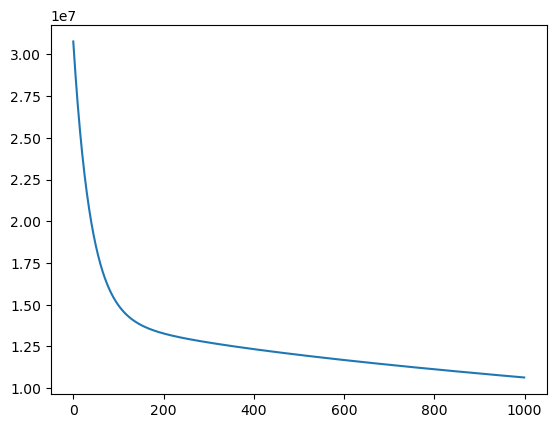

In [115]:
# Loss plot of Gradient Descent 
plt.plot(model.loss)
plt.show()

In [116]:
print(model.loss)

[30767149.796809945, 30340832.904145524, 29925276.191009164, 29520203.652734954, 29125346.377737552, 28740442.365152687, 28365236.34716649, 27999479.615913007, 27642929.854822643, 27295350.97430683, 26956512.95166765, 26626191.675123703, 26304168.791846182, 25990231.559902515, 25684172.70400653, 25385790.27497774, 25094887.51281405, 24811272.713285208, 24534759.097956337, 24265164.687553357, 24002312.178584438, 23746028.82313372, 23496146.311745714, 23252500.659321, 23014932.09394563, 22783284.948579002, 22557407.555526588, 22337152.14362586, 22122374.73807584, 21912935.062842105, 21708696.445571106, 21509525.72494933, 21315293.160444327, 21125872.34436646, 20941140.11619169, 20760976.47908714, 20585264.518583048, 20413890.32333561, 20246742.90792724, 20083714.137651645, 19924698.655232795, 19769593.809428066, 19618299.585467, 19470718.53727865, 19326755.72146134, 19186318.632950243, 19049317.142338872, 18915663.43481224, 18785271.950649977, 18658059.327259243, 18533944.342698026, 1841

In [117]:
#Saving the model weights in pickle file
with open('dmohanra_zemingzh_assignment1_gradient_bonus.pickle','wb') as file:
   pickle.dump(model.loss,file)

## Bonus Elastic Net from Scratch

In [118]:
# Using OLS equation for Ridge regression

lambda_1 = 0.1  # set the regularization parameter to some value
lambda_2 = 0.2 
I = np.eye(df_final.shape[1])  # create an identity matrix with the same dimensions as X
w_elasticnet = np.linalg.inv(df_final.transpose().dot(df_final) + lambda_value*I).dot(df_final.transpose()).dot(df_y) + lambda_2
print(w_elasticnet)

[  606.51700678   886.85413352   810.66207564   762.3597349
  -209.23859937  -276.73633816  -483.16328778  -975.32159836
 -1454.26410687 -2344.05103117  5350.84266508  3647.47272254
  2687.42858536  4569.26102894  4257.70448095  5006.0619652
  4943.19302053 52800.2375172  -2072.62676629 -1278.25030798
 -9394.04784774 -3863.76498513   391.7407175 ]


In [119]:
#Saving the model weights in pickle file
with open('dmohanra_zemingzh_assignment1_elasticnet_bonus.pickle','wb') as file:
   pickle.dump(w_elasticnet,file)

In [120]:
# the squared loss can be written as:
y_pred_elasticnet = df_final.dot(w_ridge)
mse_elasticnet = 0.5*np.sum((df_y - y_pred_elasticnet)**2) + (lambda_value * np.dot(w_elasticnet, w_elasticnet)) + lambda_2
print(mse_elasticnet)

35863809749.24878


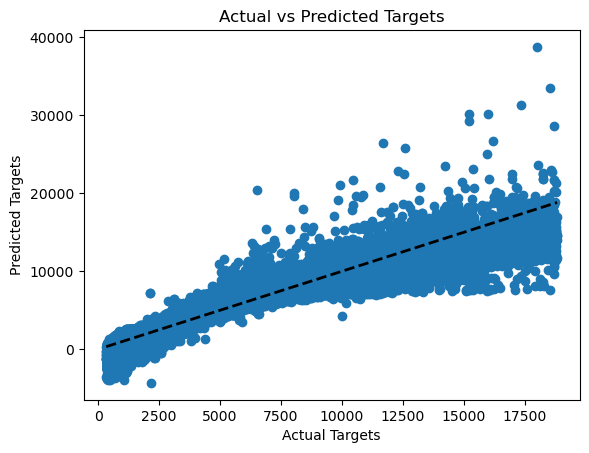

In [121]:
# create a scatter plot of the actual targets and predictions
plt.scatter(df_y, y_pred_elasticnet)

# add a diagonal line to represent perfect predictions
plt.plot([df_y.min(), df_y.max()], [df_y.min(), df_y.max()], 'k--', lw=2)

# set the axis labels and title
plt.xlabel('Actual Targets')
plt.ylabel('Predicted Targets')
plt.title('Actual vs Predicted Targets')

# show the plot
plt.show()

In [122]:
mse_elasticnet 

35863809749.24878